In [ ]:
## 颜色空间转换
## BGR->GRAY,   BGR-> HSV

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [ ]:
### BGR->GRAY

In [9]:
img = cv2.imread('f:/opencv/img/opencv1.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2.imshow('gray', gray)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [11]:
### BGR -> HSV

In [12]:
img = cv2.imread('f:/opencv/img/color.png')
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
## 定义颜色范围
lower_blue=np.array([110,100,100])#blue
upper_blue=np.array([130,255,255])

lower_green=np.array([60,100,100])#green
upper_green=np.array([70,255,255])

lower_red=np.array([0,100,100])#red
upper_red=np.array([10,255,255])

blue_mask = cv2.inRange(hsv, lower_blue, upper_blue)
green_mask = cv2.inRange(hsv, lower_green, upper_green)
red_mask = cv2.inRange(hsv, lower_red, upper_red)

blue = cv2.bitwise_and(img, img, mask = blue_mask)
green = cv2.bitwise_and(img, img, mask = green_mask)
red = cv2.bitwise_and(img, img, mask = red_mask)

dst = blue + green + red
cv2.imshow('dst', dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [13]:
### 摄像头颜色捕获--物品跟踪

In [3]:
cap = cv2.VideoCapture(0,  cv2.CAP_DSHOW)

In [14]:
while (cap.isOpened):
    ret, frame = cap.read()
    
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    
    ## 定义红色范围
    lower_red=np.array([0,100,100])
    upper_red=np.array([10,255,255])
    
    mask = cv2.inRange(hsv, lower_red, upper_red)
    res = cv2.bitwise_and(frame, frame, mask = mask)
    
    cv2.imshow('frame', frame)
    cv2.imshow('mask', mask)
    cv2.imshow('res', res)
    if (cv2.waitKey(8) == ord('q')):
        break

cv2.destroyAllWindows()

In [15]:
### 几何变换

In [16]:
## 图片缩放

In [18]:
img = cv2.imread('f:/opencv/img/cat2.jpg')

res1 = cv2.resize(img, None, fx = 2, fy = 2, interpolation = cv2.INTER_CUBIC)
## 等同于
##height, width, channel = img.shape()
##res1 = cv2.resize(img, (2*width, 2*height), interpolation = cv2.INTER_CUBIC)
cv2.imshow('img', img)
cv2.imshow('res1', res1)
cv2.waitKey(0)
cv2.destroyAllWindows()

### 图片平移
![jupyter](./pic_move.jpg)

In [20]:
img = cv2.imread('f:/opencv/img/cat2.jpg', 0)  ## 灰色 单通道
rows, cols = img.shape

M = np.array([[1,0,100],[0,1,50]], dtype = np.float32)
dst = cv2.warpAffine(img,M,(cols,rows))
cv2.imshow('img', img)
cv2.imshow('dst', dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

## 图片旋转
![jupyter](./pic_rotation.jpg)

In [26]:
img = cv2.imread('f:/opencv/img/cat2.jpg', 0)
rows, cols = img.shape
# 这里的第一个参数为旋转中心，第二个为旋转角度，第三个为旋转后的缩放因子
# 可以通过设置旋转中心，缩放因子，以及窗口大小来防止旋转后超出边界的问题
M = cv2.getRotationMatrix2D((cols/2, rows/2), 45, 0.6)
dst = cv2.warpAffine(img, M, (cols, rows))
M1 = cv2.getRotationMatrix2D((cols/4, rows/4), 45, 0.6)
dst1 = cv2.warpAffine(img, M, (int(cols*1.5), int(rows*1.5)))
cv2.imshow('img', img)
cv2.imshow('dst', dst)
cv2.imshow('dst1', dst1)
cv2.waitKey(0)
cv2.destroyAllWindows()

### 仿射变换
![jupyter](./pic_afflinetran.jpg)

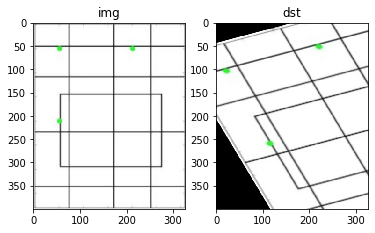

In [30]:
img = cv2.imread('f:/opencv/img/afflinetran.jpg')
rows, cols, channels = img.shape
points_src = np.float32([[50,50],[200,50],[50,200]])       ## 原图三个点坐标
points_dst = np.float32([[10,100],[200,50],[100,250]])     ## 变换后三个点坐标

M = cv2.getAffineTransform(points_src, points_dst)
dst = cv2.warpAffine(img, M, (cols, rows))

plt.subplot(121)
plt.imshow(img)
plt.title('img')

plt.subplot(122)
plt.imshow(dst)
plt.title('dst')
plt.show()

#cv2.imshow('img', img)
#cv2.imshow('dst', dst)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

### 透视变换
![jupyter](./pic_perspect.jpg)

(420, 420, 3)


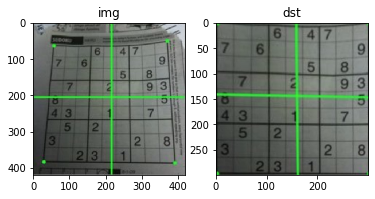

In [36]:
img = cv2.imread('f:/opencv/img/pic_perspective.png')
img = cv2.resize(img, (420, 420), interpolation = cv2.INTER_CUBIC)
rows, cols, channels = img.shape

print(img.shape)
points_src = np.float32([[56,65],[368,52],[28,387],[389,390]])  ## 原图4个点坐标
points_dst = np.float32([[0,0],[300,0],[0,300],[300,300]])     ## 变换后4个点坐标

M= cv2.getPerspectiveTransform(points_src, points_dst)
dst = cv2.warpPerspective(img, M, (300, 300))


plt.subplot(121)
plt.imshow(img)
plt.title('img')

plt.subplot(122)
plt.imshow(dst)
plt.title('dst')
plt.show()

In [ ]:
### 图片阈值

In [ ]:
## 简单阈值
#　　与名字一样，这种方法非常简单。但像素值高于阈值时，我们给这个像素赋予一个新值（可能是白色），否则我们给它赋予另外一种颜色（也许是黑色）。这个函数就是 cv2.threshhold()。这个函数的第一个参数就是原图像，原图像应该是灰度图。
#    第二个参数就是用来对像素值进行分类的阈值。第三个参数就是当像素值高于（有时是小于）阈值时应该被赋予的新的像素值。OpenCV提供了多种不同的阈值方法，这是有第四个参数来决定的。这些方法包括：
#　　• cv2.THRESH_BINARY
#　　• cv2.THRESH_BINARY_INV
#　　• cv2.THRESH_TRUNC
#　　• cv2.THRESH_TOZERO
#　　• cv2.THRESH_TOZERO_INV

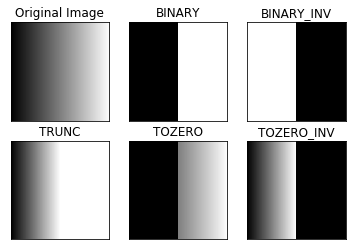

In [42]:
img = np.zeros((256,256), dtype = np.uint8)
for i in range(img.shape[1]):
    img[:, i] = i
    
ret, thres1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
ret, thres2 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)
ret, thres3 = cv2.threshold(img, 127, 255, cv2.THRESH_TRUNC)
ret, thres4 = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO)
ret, thres5 = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thres1, thres2, thres3, thres4, thres5]

for i in range(6):
    plt.subplot(2,3,i+1),
    plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

In [43]:
### 自适应阈值
# 上节使用是全局阈值，整幅图像采用同一个数作为阈值。当时这种方法并不适应与所有情况，尤其是当同一幅图像上的不同部分的具有不同亮度时。这种情况下我们需要采用自适应阈值。此时的阈值是根据图像上的每一个小区域计算与其对应的阈值。因此在同一幅图像上的不同区域采用的是不同的阈值，从而使我们能在亮度不同的情况下得到更好的结果。
# 这种方法需要我们指定三个参数，返回值只有一个。
#　　• Adaptive Method- 指定计算阈值的方法。
#　　– cv2.ADPTIVE_THRESH_MEAN_C：阈值取自相邻区域的平均值
#　　– cv2.ADPTIVE_THRESH_GAUSSIAN_C：阈值取值相邻区域的加权和，权重为一个高斯窗口。
#　　• Block Size - 邻域大小（用来计算阈值的区域大小）。  一般取3，5，7..... 奇数值
#　　• C - 这就是是一个常数，阈值就等于的平均值或者加权平均值减去这个常数。

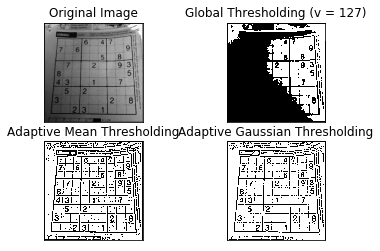

In [10]:
img = cv2.imread('f:/opencv/img/sudu.png', 0) 
img = cv2.resize(img, None, fx = 2, fy = 2, interpolation = cv2.INTER_CUBIC)
img = cv2.medianBlur(img, 5)  ### 中值滤波， 取5*5 矩形内的中间值 。  用于去除图片燥点， 其它用cv2.blur 均值滤波， cv2.boxfilter 方框滤波， cv2.Guassianblur 高斯滤波

ret, thres1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
thres2 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
thres3 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
titles = ['Original Image', 'Global Thresholding (v = 127)','Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, thres1, thres2, thres3]

for i in range(4):
    plt.subplot(2, 2, i + 1)
    plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])
plt.show()

cv2.imshow('img', img)
cv2.imshow('thres1', thres1)
cv2.imshow('thres2', thres2)
cv2.imshow('thres3', thres3)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
### Ostu 二值化
# 在使用全局阈值时，我们就是随便给了一个数来做阈值，那我们怎么知道我们选取的这个数的好坏呢？答案就是不停的尝试。如果是一副双峰图像（简单来说双峰图像是指图像直方图中存在两个峰）呢？我们岂不是应该在两个峰之间的峰谷选一个值作为阈值？
# 这就是 Otsu 二值化要做的。简单来说就是对一副双峰图像自动根据其直方图计算出一个阈值。（对于非双峰图像，这种方法得到的结果可能会不理想）。
# 这里用到到的函数还是 cv2.threshold()，但是需要多传入一个参数（flag）：cv2.THRESH_OTSU。这时要把阈值设为 0。然后算法会找到最优阈值，这个最优阈值就是返回值 retVal。如果不使用 Otsu 二值化，返回的retVal 值与设定的阈值相等


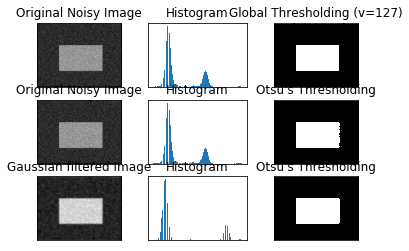

In [12]:
img = cv2.imread('f:/opencv/img/noisy.png',0)

# global thresholding
ret1,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)

# Otsu's thresholding
ret2,th2 = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# Otsu's thresholding after Gaussian filtering
blur = cv2.GaussianBlur(img,(5,5),0)
ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# plot all the images and their histograms
images = [img, 0, th1,
          img, 0, th2,
          blur, 0, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
          'Original Noisy Image','Histogram',"Otsu's Thresholding",
          'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]

for i in range(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()